In [12]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

# Task 1: One Vs. All SVM

$$ \frac{\partial \mathscr{L}}{\partial \mathbf{w}} = \mathbf{w} + \lambda \sum_{i} \begin{cases} 0 ,& y_i\mathbf{w}^{T}\mathbf{x}_{i} \geq 1 \\ -y_{i}\mathbf{x}_{i},& else\end{cases}$$

In [6]:
class OneVAllSVM(object):
    def __init__(self, random_seed = None):
        self.random = np.random.RandomState(random_seed)
    
    def train(self, x, y, lamb, lr, iters):
        n_samples = x.shape[0]
        n_features = x.shape[1]
        self.n_features = n_features
        n_classes = len(np.unique(y))
        self.n_classes = n_classes
        
        
        #Add bias column
        x = np.hstack((np.ones((n_samples, 1)), x))
        
        #"Xavier" initialization
        W = self.random.normal(0, np.sqrt(2/(n_features+1)), 
                             (n_classes,n_features+1))
        self.W = W
        
        for i in range(n_classes):
            #convert to one versus all labeling
            class_i = np.unique(y)[i]
            y_1va = np.array([0 if yi == class_i else 1 for yi in y])
            
            dLdw = lambda w: w + lamb * np.sum(
                [0 if y[i]*np.dot(w, x[i]) >= 1 
                else -y[i]*x[i] for i in range(n_samples)],
                axis = 0
            )
            
            for iteration in range(iters):
                W[i] = W[i] - .01*dLdw(W[i])
    
    def predict(self, x):
        x_bias = np.hstack((np.ones((x.shape[0], 1)), x))
        return(
            np.array(
                [
                    [np.dot(self.W[i], x_bias[j]) for i in range(self.n_classes)]
                    for j in range(len(x_bias))
                ]
            )
        )

In [7]:
y = iris['target']
x = iris['data']

In [8]:
svm = OneVAllSVM(10)
svm.train(x, y, lamb = .5, lr = .01, iters = 1000)

In [9]:
svm.W

array([[ 0.03236955,  0.16060466,  0.07220249,  0.10883328,  0.03235331],
       [ 0.02634974,  0.13102731,  0.06149636,  0.08658295,  0.02681939],
       [ 0.02338373,  0.11614591,  0.05448328,  0.0767518 ,  0.0237765 ]])

In [10]:
svm.predict(x)

array([[ 1.2629993 ,  1.03640632,  0.91862715],
       [ 1.19477712,  0.97945268,  0.86815633],
       [ 1.16621336,  0.95688819,  0.84814862],
       [ 1.1646993 ,  0.95495241,  0.84643606],
       [ 1.25415908,  1.02945322,  0.91246089],
       [ 1.37918234,  1.13165182,  1.00304507],
       [ 1.17871205,  0.96742497,  0.85748352],
       [ 1.25060191,  1.02581225,  0.90923941],
       [ 1.10725454,  0.90778938,  0.80463505],
       [ 1.20964537,  0.99157867,  0.87890219],
       [ 1.33650453,  1.09667208,  0.97204276],
       [ 1.22936431,  1.00826508,  0.89368541],
       [ 1.17548133,  0.96366801,  0.85416409],
       [ 1.06252901,  0.87217946,  0.77306559],
       [ 1.38975715,  1.14155703,  1.01182056],
       [ 1.44169833,  1.18439161,  1.04978012],
       [ 1.33564903,  1.09701864,  0.97234435],
       [ 1.26623463,  1.03908826,  0.9210048 ],
       [ 1.41690816,  1.16212844,  1.03006287],
       [ 1.29877871,  1.06619546,  0.94502496],
       [ 1.33661043,  1.09553976,  0.971

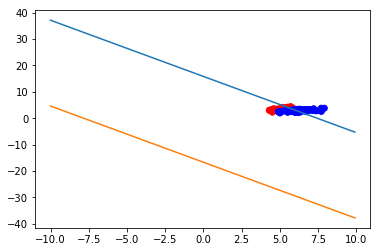

In [23]:
W = svm.W 
plotrange = np.arange(-10,10,.1)
plt.plot(plotrange, ((1-W[1,0])-W[1,1]*plotrange)/W[1,2])
plt.plot(plotrange, ((-1-W[1,0])-W[1,1]*plotrange)/W[1,2])
plt.scatter(x[:,0], x[:,1], color = np.array(['r' if yi ==0 else 'b' for yi in y]))